# Plotting with Python
This is the corresponding Jupyter Notebook part to the EBC Python Tutorial section Advanced concepts/Create plots
## Configuring the plot layout
In the first few sections we told you to take some time to set up your figures. Instead of altering the rcParams file directly, we would suggest, that you create a dictionary of values that you would like to alter and call this explicitly for your plots. There are a lot more parameters in the rcParams file, but you can probably stick with the default values.

Below are the definitions for several different variations and an example why it is great to use them.

<IPython.core.display.Javascript object>


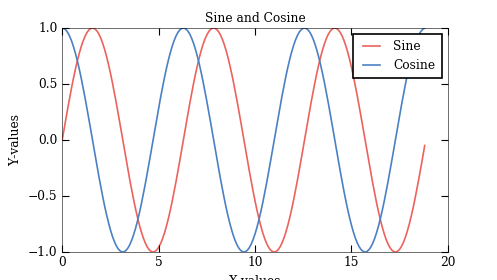

<IPython.core.display.Javascript object>


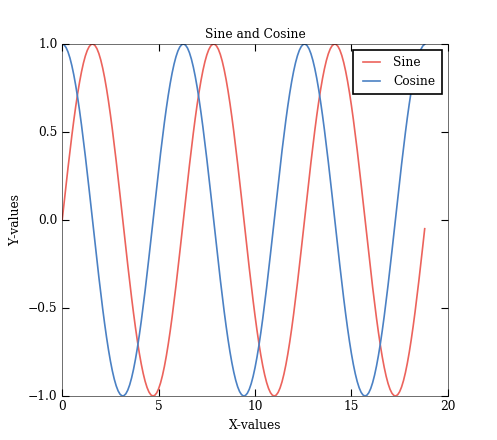

<IPython.core.display.Javascript object>


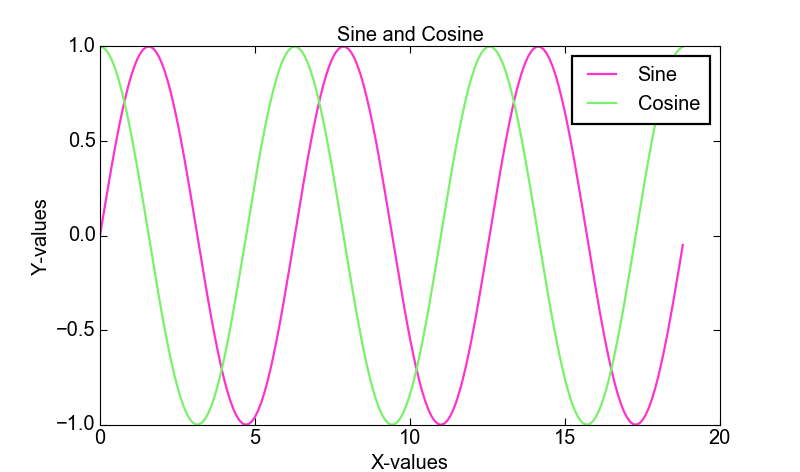

In [20]:
%matplotlib notebook
from cycler import cycler
import numpy as np
import pandas as pd
import pylab as plt
latex_base = {'figure.figsize'   : [6.220,3.5]    # figure size in inches
                ,'figure.dpi'       : 80      # figure dots per inch
                # Eigenschaften der Achsen
                ,'axes.linewidth'      : 0.5     # edge linewidth
                ,'axes.grid'           : False   # display grid or not
                ,'axes.titlesize'      : 11.0   # fontsize of the axes title
                ,'axes.labelsize'      : 11.0  # fontsize of the x any y labels
                ,'axes.prop_cycle'    : (cycler('color',['#EC635C', '#4B81C4', '#F49961', '#8768B4', '#B45955','#CB74F4','#6EBB96']))  # color cycle for plot lines
                # Eigenschaften der Tick-Marker
                ,'xtick.labelsize'      : 11.0 # fontsize of the tick labels
                ,'ytick.labelsize'      : 11.0 # fontsize of the tick labels
                # Eigenschaften der Linienplots
                ,'lines.linewidth'   : 1.5     # line width in points
                ,'lines.linestyle'   : '-'       # solid line
                ,'lines.marker'      : None    # the default marker
                ,'lines.markeredgewidth'  : 1.5     # the line width around the marker symbol
                # Eigenschaften der Flächen
                ,'patch.linewidth'        : 1.5     # edge width in points
                ,'patch.facecolor'        : '#EC635C'
                ,'patch.edgecolor'        : '#EC635C'
                # Eigenschaften der Legende
                ,'legend.fontsize'      : 11.0
                ,'legend.borderpad'     : 0.5    # border whitespace in fontsize units
                ,'legend.markerscale'   : 1.0    # the relative size of legend markers vs. original
                ,'legend.frameon'       : True   # whether or not to draw a frame around legend
                # Eigenschaften der Schriften
                ,'font.family'         : 'serif'
                ,'font.stretch'        : 'normal'
                ,'font.size'           : 11.0
                ,'font.sans-serif'     : ['Arial', 'Helvetica','sans-serif']
                # Eigenschaften fürs Speichern
                ,'savefig.dpi'         : 600      # figure dots per inch
                ,'savefig.format'      : 'pdf'      # png, ps, pdf, svg
                }

# Create another dictionary from the old one for larger figures.
latex_twothird = latex_base.copy() # You need to use the copy method, otherwise you will alter both dictionaries
latex_twothird['figure.figsize'] = [6.220, 5.5]

# And one for fullsize figures
latex_fullpage = latex_base.copy()
latex_fullpage['figure.figsize'] = [6.220, 7.87]

# And here is one for Powerpoint presentations with fancy colors
pp_figure = latex_base.copy()
pp_figure['axes.prop_cycle'] = (cycler('color',['#ff33cc', '#79f169', '#F49961', '#8768B4', '#B45955','#CB74F4','#6EBB96']))  # color cycle for plot lines
pp_figure['figure.figsize'] = [10,5.91]    # figure size in inches
pp_figure['axes.linewidth'] = 1     # edge linewidth
pp_figure['axes.titlesize'] =  18.0   # fontsize of the axes title
pp_figure['axes.labelsize'] = 18.0  # fontsize of the x any y labels
pp_figure['xtick.major.size'] = 6      # major tick size in points
pp_figure['xtick.minor.size'] = 3      # minor tick size in points
pp_figure['xtick.major.width'] = 1    # major tick width in points
pp_figure['xtick.minor.width'] = 1    # minor tick width in points
pp_figure['xtick.labelsize'] = 18.0 # fontsize of the tick labels
pp_figure['ytick.major.size'] = 6      # major tick size in points
pp_figure['ytick.minor.size'] = 3      # minor tick size in points
pp_figure['ytick.major.width'] = 1    # major tick width in points
pp_figure['ytick.minor.width'] = 1    # minor tick width in points
pp_figure['ytick.labelsize'] = 18.0 # fontsize of the tick labels
pp_figure['lines.linewidth'] = 2     # line width in points
pp_figure['lines.markeredgewidth'] = 2     # the line width around the marker symbol
pp_figure['lines.markersize'] = 8            # markersize, in points
pp_figure['patch.linewidth'] = 2.0     # edge width in points
pp_figure['legend.fontsize'] = 18.0
pp_figure['font.size'] = 18.0
pp_figure['font.family'] = 'sans-serif'
pp_figure['savefig.dpi'] = 150      # figure dots per inch
pp_figure['savefig.format'] = 'png'      # png, ps, pdf, svg

def create_plot():
    #Generate some  Data
    x = np.arange(0,6*np.pi, 0.1)
    y1 = np.sin(x)
    y2 = np.cos(x)
    
    #create output
    fig, ax = plt.subplots()
    plt.plot(x,y1)
    plt.plot(x,y2)
    ax.set_title('Sine and Cosine')
    ax.set_xlabel('X-values')
    ax.set_ylabel('Y-values')
    leg = ax.legend(['Sine', 'Cosine'])
    return fig, ax, leg
             
# Set dictionaries and plot results
plt.rcParams.update(latex_base)
fig1, ax1, leg1 = create_plot()
plt.rcParams.update(latex_twothird)
fig2, ax2, leg2 = create_plot()
plt.rcParams.update(pp_figure)
fig3, ax3, leg3 = create_plot()


Quite obviously you can easily change the appearance of your figure without to much trouble if you set up your layout dictionaries before.
We would suggest to

- keep three Latex dictionaries, one for figures a bit smaller than half the textheight of your doccument, to allow the placement of to figures on one page, one larger figure if you need some more space for your plot but where text still fits beneath and one full size figure
- One dictionary for Powerpoint presentations. Make the lines a bit thicker, increase the font size (16pt is EBC minimum for presentations!), user beamer save, saturated colores (i.e. Not the green in the figure above)

You may have realized that the frame around the legend is to thick compared to the axes. This is because as of now there is no rcParams value for this (this may be changed with release of matplotlib 2.0). You can use this piece of code to fix this:

``` python
frame = leg.get_frame()
axes_linewidth = ax.spines['bottom']
frame.set_linewidth(axes_linewidth._linewidth)
```

with ax and leg beeing the correct handles to your axes and legend artist. This corrections is automatically applied if you use our ebcplot-tools and saving methods (more on this later on).

<IPython.core.display.Javascript object>


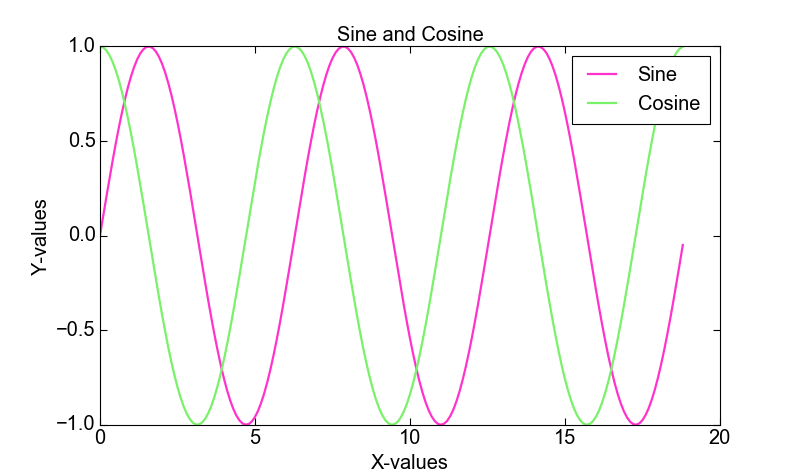

In [19]:
fig, ax, leg = create_plot()
frame = leg.get_frame()
axes_linewidth = ax.spines['bottom']
frame.set_linewidth(axes_linewidth._linewidth)